In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import ta

In [32]:
#Obtain data from yahoofinance
df = yf.download('SPY', start = '2003-01-29')
#display data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-29,85.419998,87.180000,84.769997,86.480003,58.038311,53712200
2003-01-30,86.790001,86.879997,84.400002,84.430000,56.662525,49845900
2003-01-31,84.150002,86.209999,84.150002,86.059998,57.756451,55317000
2003-02-03,86.139999,86.809998,85.919998,86.230003,57.870541,39696000
2003-02-04,85.309998,85.750000,84.300003,85.379997,57.300102,43633400
...,...,...,...,...,...,...
2023-12-18,470.980011,472.980011,469.890015,471.970001,471.970001,70375300
2023-12-19,472.529999,474.920013,472.450012,474.839996,474.839996,55761800
2023-12-20,473.959991,475.899994,467.820007,468.260010,468.260010,102921000


In [33]:
#Create new column to store Daily Simple Returns
df['DSR'] = df['Close'].pct_change(1)
df['DSR']

Date
2003-01-29         NaN
2003-01-30   -0.023705
2003-01-31    0.019306
2003-02-03    0.001975
2003-02-04   -0.009857
                ...   
2023-12-18    0.005625
2023-12-19    0.006081
2023-12-20   -0.013857
2023-12-21    0.009482
2023-12-22    0.002010
Name: DSR, Length: 5263, dtype: float64

In [34]:
#Obtain Log returns
df['Log_Returns'] = np.log(1 + df['DSR']) 
df['Log_Returns']

Date
2003-01-29         NaN
2003-01-30   -0.023990
2003-01-31    0.019122
2003-02-03    0.001973
2003-02-04   -0.009906
                ...   
2023-12-18    0.005609
2023-12-19    0.006062
2023-12-20   -0.013954
2023-12-21    0.009437
2023-12-22    0.002008
Name: Log_Returns, Length: 5263, dtype: float64

In [35]:
#Get and store the month name & month return
#Create empty lists to sotre the values
MONTH_NAME = []
MONTH_NUM = []

#Create a loop to gather these values
for i in range(0, len(df)):
    df_date = str(df.index[i])
    df_month = df_date.split('-')[1]
    df_month_name = calendar.month_name[int(df_month)]
    
    
    MONTH_NAME.append(df_month_name)
    MONTH_NUM.append(int(df_month))
    

In [36]:
df['Month_Full_Name'] = MONTH_NAME
df['Month_Num'] = MONTH_NUM
df

,Open,High,Low,Close,Adj Close,Volume,DSR,Log_Returns,Month_Full_Name,Month_Num
Date,,,,,,,,,,
2003-01-29,85.419998,87.180000,84.769997,86.480003,58.038311,53712200,NaN,NaN,January,1
2003-01-30,86.790001,86.879997,84.400002,84.430000,56.662525,49845900,-0.023705,-0.023990,January,1
2003-01-31,84.150002,86.209999,84.150002,86.059998,57.756451,55317000,0.019306,0.019122,January,1
2003-02-03,86.139999,86.809998,85.919998,86.230003,57.870541,39696000,0.001975,0.001973,February,2
2003-02-04,85.309998,85.750000,84.300003,85.379997,57.300102,43633400,-0.009857,-0.009906,February,2
...,...,...,...,...,...,...,...,...,...,...
2023-12-18,470.980011,472.980011,469.890015,471.970001,471.970001,70375300,0.005625,0.005609,December,12
2023-12-19,472.529999,474.920013,472.450012,474.839996,474.839996,55761800,0.006081,0.006062,December,12
2023-12-20,473.959991,475.899994,467.820007,468.260010,468.260010,102921000,-0.013857,-0.013954,December,12


In [37]:
#group and store the mean log returns in a variable
series = df.groupby('Month_Num')['Log_Returns'].mean()*100


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

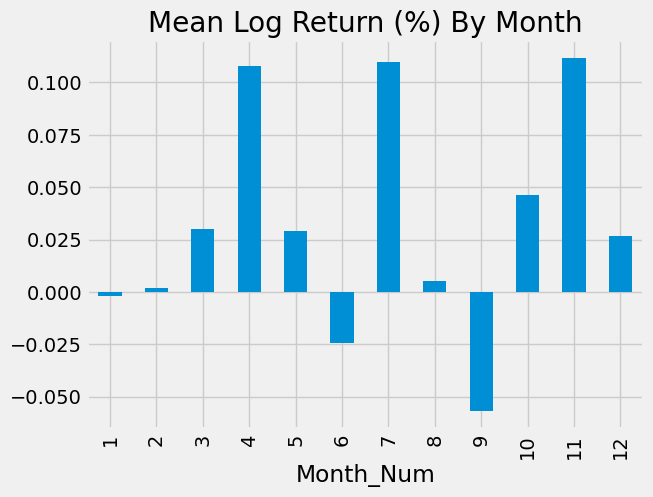

In [38]:
series.plot(kind = 'bar', title = 'Mean Log Return (%) By Month')
plt.xticks(rotation = 90)

In [48]:
def get_seasonality(df):
    Seasonality = []
    for i in range(0, len(df)):
        month = df['Month_Num'][i]
        if month >= 5 and month <= 10:
            Seasonality.append('May-Oct')
        else:
            Seasonality.append('Nov-Apr')
    return Seasonality
    

In [49]:
df['Seasonality'] = get_seasonality(df)

In [50]:
seas = df.groupby('Seasonality')['Log_Returns'].mean()*100
seas

Seasonality
May-Oct    0.018436
Nov-Apr    0.046847
Name: Log_Returns, dtype: float64

Text(0, 0.5, 'Mean Log Returns')

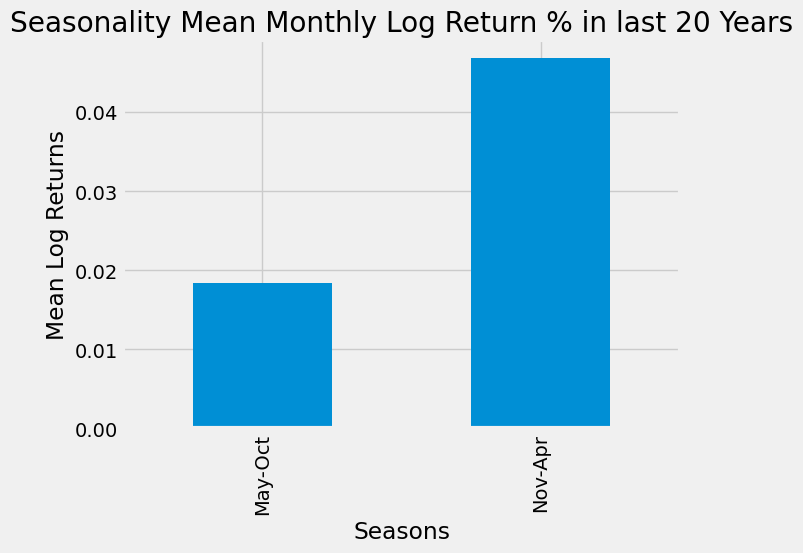

In [51]:
seas.plot(kind = 'bar', title = 'Seasonality Mean Monthly Log Return % in last 20 Years')
plt.xlabel('Seasons')
plt.ylabel('Mean Log Returns')